In [1]:
!wget "http://immortal.multicomp.cs.cmu.edu/raw_datasets/old_processed_data/iemocap/data.zip"

--2019-07-10 13:38:20--  http://immortal.multicomp.cs.cmu.edu/raw_datasets/old_processed_data/iemocap/data.zip
Resolving immortal.multicomp.cs.cmu.edu (immortal.multicomp.cs.cmu.edu)... 128.2.211.216
Connecting to immortal.multicomp.cs.cmu.edu (immortal.multicomp.cs.cmu.edu)|128.2.211.216|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 311438653 (297M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>] 297.01M  31.4MB/s    in 9.9s    

2019-07-10 13:38:35 (29.9 MB/s) - ‘data.zip’ saved [311438653/311438653]



In [2]:
!git clone "https://github.com/convman/Multimodal.git"

Cloning into 'Multimodal'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 405 (delta 36), reused 0 (delta 0), pack-reused 350
Receiving objects: 100% (405/405), 895.11 MiB | 40.46 MiB/s, done.
Resolving deltas: 100% (144/144), done.
Checking out files: 100% (192/192), done.


In [3]:
!unzip -P "hello_iemocap_2008" data.zip

Archive:  data.zip
   creating: data/
  inflating: data/facet_valid.p      
  inflating: data/facet_test.p       
  inflating: data/covarep_test.p     
  inflating: data/facet_train.p      
  inflating: data/text_train.p       
  inflating: data/y_test.p           
  inflating: data/text_test.p        
  inflating: data/text_valid.p       
  inflating: data/covarep_valid.p    
  inflating: data/y_valid.p          
  inflating: data/y_train.p          
  inflating: data/covarep_train.p    


In [4]:
import pickle

Train_video = pickle.load(open("data/facet_train.p",'rb'),encoding='latin1')
Test_video = pickle.load(open("data/facet_test.p",'rb'),encoding='latin1')
Valid_video = pickle.load(open("data/facet_valid.p",'rb'),encoding='latin1')

Train_text = pickle.load(open("data/text_train.p",'rb'),encoding='latin1')
Test_text = pickle.load(open("data/text_test.p",'rb'),encoding='latin1')
Valid_text = pickle.load(open("data/text_valid.p",'rb'),encoding='latin1')

Train_audio = pickle.load(open("data/covarep_train.p",'rb'),encoding='latin1')
Test_audio = pickle.load(open("data/covarep_test.p",'rb'),encoding='latin1')
Valid_audio = pickle.load(open("data/covarep_valid.p",'rb'),encoding='latin1')

Y_train =  pickle.load(open("data/y_train.p",'rb'),encoding='latin1')
Y_test =  pickle.load(open("data/y_test.p",'rb'),encoding='latin1')
Y_valid =  pickle.load(open("data/y_valid.p",'rb'),encoding='latin1')

Y_train = Y_train[:,1:-1]  # selecting only emotion label and ignoring others and unknown
Y_test = Y_test[:,1:-1]    # regarding 11 features:
Y_valid = Y_valid[:,1:-1]  # Other Anger Excited Fear Sad Surprised Frustrated Happy Neutral Disgust (unknown)

print(Train_video.shape,Test_video.shape,Valid_video.shape)
print(Train_text.shape,Test_text.shape,Valid_text.shape)
print(Train_audio.shape,Test_audio.shape,Valid_audio.shape)



Y_train = Y_train[:,[0,1,3,5,6,7]]
Y_test = Y_test[:,[0,1,3,5,6,7]]
Y_valid = Y_valid[:,[0,1,3,5,6,7]]
target_names = ['Anger','Excited','Sad','Frustrated','Happy','Neutral']
map = {0:"Anger",1:"Excited",2:"Fear",3:"Sad",4:"Surprised",5:"Frustrated",6:"Happy",7:"Neutral",8:"Disgust"}
print(Y_train.shape,Y_test.shape,Y_valid.shape)

(6373, 21, 35) (1807, 21, 35) (1775, 21, 35)
(6373, 21, 300) (1807, 21, 300) (1775, 21, 300)
(6373, 21, 74) (1807, 21, 74) (1775, 21, 74)
(6373, 6) (1807, 6) (1775, 6)


In [5]:
import pandas as pd
import numpy as np
import h5py
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.utils.multiclass import unique_labels
import keras
import tensorflow as tf
from time import time
import scipy
from scipy.io import savemat
from keras import layers
from google.colab import files	
from keras.models import load_model
from keras.models import Model,Sequential,Model
from keras.layers import *
from keras.callbacks import TensorBoard
from keras import callbacks
from keras.callbacks import *
%matplotlib inline

Using TensorFlow backend.


In [6]:
Train_concat = np.concatenate((Train_audio,Train_text,Train_video),axis=-1)
Test_concat = np.concatenate((Test_audio,Test_text,Test_video),axis=-1)
Valid_concat = np.concatenate((Valid_audio,Valid_text,Valid_video),axis=-1)

print(Train_concat.shape)
print(Test_concat.shape)
print(Valid_concat.shape)

(6373, 21, 409)
(1807, 21, 409)
(1775, 21, 409)


In [7]:
m = load_model("Multimodal/iemocap sdk/multimodal/v2 - late fusion/weights/late_fusion.h5")

W0710 13:40:47.450124 140665897596800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 13:40:47.499241 140665897596800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0710 13:40:47.510211 140665897596800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0710 13:40:51.016646 140665897596800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0710 13:40:51.017632 1406658975

In [8]:
m.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_76 (InputLayer)           (None, 21, 74)       0                                            
__________________________________________________________________________________________________
input_77 (InputLayer)           (None, 21, 35)       0                                            
__________________________________________________________________________________________________
input_78 (InputLayer)           (None, 21, 300)      0                                            
__________________________________________________________________________________________________
sequential_5 (Sequential)       (None, 64)           194688      input_76[0][0]                   
__________________________________________________________________________________________________
sequential

In [12]:
m.layers[-1]

In [9]:
model = Model(m.input,m.get_layer('dense_150').output)
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_76 (InputLayer)           (None, 21, 74)       0                                            
__________________________________________________________________________________________________
input_77 (InputLayer)           (None, 21, 35)       0                                            
__________________________________________________________________________________________________
input_78 (InputLayer)           (None, 21, 300)      0                                            
__________________________________________________________________________________________________
sequential_5 (Sequential)       (None, 64)           194688      input_76[0][0]                   
__________________________________________________________________________________________________
sequential

In [0]:
Dtrain = model.predict([Train_audio,Train_video,Train_text])
Dtest = model.predict([Test_audio,Test_video,Test_text])

In [16]:
Dtrain.shape

(6373, 64)

In [17]:
Dtest.shape

(1807, 64)

In [0]:
savemat("Dtrain.mat",{'val':Dtrain})
savemat("Dtest.mat",{'val':Dtest})

In [0]:
files.download("Dtrain.mat")
files.download("Dtest.mat")

In [20]:
files.upload()

Saving data.mat to data.mat


{'data.mat': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Jul 10 22:49:23 2019                                        \x00\x00\x00\x00\x00\x00\x00\x00\x00\x01IM\x0f\x00\x00\x00\xaeU\x02\x00x\x9cd\x99yTMm\xd8\xffK\x12\x89R\x19*\xc9\xd8S<\x1a$D\xf9\xaa\x10\r\x92\xd2\x88\x0c\xcdEJD\x1aI\xa4\x94P\x84\x88(\xc9\x90h\x1e\x0c9\r\x9a\xe7N\x9ds:\xf3X\xa7hT\xe2=\xefZ\xef\xcf\xf3\xc7\xef\xac\xb5\xd7\xb5\xf6\xd9\xfb>\xfb\xbe\xef}]\x9f\xeb\xfb]g\xbe\x98\x98X\xf7\xf3\x19b\xb3Dq\xb6\xe8\xf8\xdf\xf8\xbf\x1f\xc9\xff;\x97\x95\x12\x13\x93\x11E\xf1\xff\xfbng\x90\xfb\x99 Q\x9c#:\xd2E\xe3\xc2;\xc6\x9b_\x84\t\xf0Eo\xaf\xce\x12y*\x1cm\r\x1e\xff\x92b\xc2\xea\x01\xcf:\xdd\x83\x8c\x0b\xf6~\x17\xea~2\xf0\xd85$\xab\xcc\x90\x03m\x95"\x93/\x04\x174\xb8\x1d\x9d>i-\xc0+\x7f_\xfd\xdb~\x0c\xcc\xd3\xd2/Z\xef\xccFlli\x93k8\x03;\xcd-S\x7f\x973\xe0\xed{\xbc\xdf\xeeD#\xa4"\xa2</\x9f\xa3\xe2\xb9V:OmB\x80&]\xa5\xd1\x99<&\x9e\xcd\r\xa7\xb5\x96R\xf1\xfa\x82\xcc\x94\xfb)\n$\xebj\xad\x1e\xef,\x85\xe6\xbb4\xd7\xb1">\x84

In [0]:
mat = scipy.io.loadmat('data.mat')

In [0]:
Dtest = mat['Dtest']
Dtrain = mat['Dtrain']

In [23]:
print(Dtrain.shape,Dtest.shape)

(6373, 12) (1807, 12)


In [24]:
print(Y_train.shape,Y_test.shape)

(6373, 6) (1807, 6)


In [25]:
am = Sequential()
am.add(Dense(32,activation='relu'))

am.add(Dense(6,activation='softmax'))
am.compile('adam','categorical_crossentropy',metrics=['accuracy'])

es = EarlyStopping(monitor='val_acc',mode='max' ,patience=5, min_delta=0.0001,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2,patience=2,min_lr=0.00001)
am.fit(Dtrain,Y_train,128,epochs=100,validation_split=0.1,callbacks=[es,reduce_lr])
print(am.summary())

Train on 5735 samples, validate on 638 samples
Epoch 1/100
5735/5735 [==============================] - 1s 147us/step - loss: 1.1350 - acc: 0.4323 - val_loss: 1.0756 - val_acc: 0.5831
Epoch 2/100
5735/5735 [==============================] - 0s 25us/step - loss: 0.9380 - acc: 0.6108 - val_loss: 0.8414 - val_acc: 0.7398
Epoch 3/100
5735/5735 [==============================] - 0s 26us/step - loss: 0.7479 - acc: 0.7196 - val_loss: 0.6516 - val_acc: 0.7821
Epoch 4/100
5735/5735 [==============================] - 0s 24us/step - loss: 0.5913 - acc: 0.7486 - val_loss: 0.5187 - val_acc: 0.8025
Epoch 5/100
5735/5735 [==============================] - 0s 24us/step - loss: 0.4742 - acc: 0.7803 - val_loss: 0.4249 - val_acc: 0.8260
Epoch 6/100
5735/5735 [==============================] - 0s 26us/step - loss: 0.3951 - acc: 0.7888 - val_loss: 0.3662 - val_acc: 0.8323
Epoch 7/100
5735/5735 [==============================] - 0s 24us/step - loss: 0.3443 - acc: 0.7935 - val_loss: 0.3326 - val_acc: 0.8276


1807/1807 [==============================] - 0s 47us/step
[1.346362506611016, 0.3962368566932504]
###############################################################
UNIMODAL VISUAL RESULTS
              precision    recall  f1-score   support

       Anger       0.56      0.40      0.47       677
     Excited       0.26      0.45      0.32       141
         Sad       0.48      0.50      0.49       193
  Frustrated       0.29      0.53      0.38       278
       Happy       0.27      0.16      0.20       135
     Neutral       0.40      0.30      0.34       383

    accuracy                           0.40      1807
   macro avg       0.38      0.39      0.37      1807
weighted avg       0.43      0.40      0.40      1807



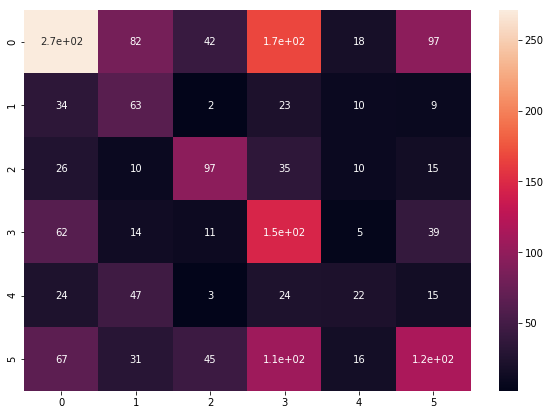

In [26]:
print(am.evaluate(Dtest,Y_test))
print("###############################################################")
y_pred = np.argmax(am.predict(Dtest),axis=1)
y_true = np.argmax(Y_test,axis=1)
cm = confusion_matrix(y_true,y_pred)
np.save("cm_video.npy",cm)
df = pd.DataFrame(cm)
plt.figure(figsize = (10,7),)
print("UNIMODAL VISUAL RESULTS")
print(classification_report(y_true,y_pred,target_names=target_names))
sn.heatmap(cm, annot=True,xticklabels=True,yticklabels=True)